In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## Parte 2


In [2]:
passa_baixa = pd.read_csv('parte2_1000ohm_0u22_dados_circuito_a.csv')
passa_alta = pd.read_csv('parte2_1000ohm_0u22_dados_circuito_b_dados.csv')

In [3]:
passa_baixa.columns

Index(['frequencia (Hz)', 'Vpp1 (V)', 'Vpp2 (V)', 'fase (Ch2-Ch1) (graus)',
       'T', 'T_dB'],
      dtype='object')

In [4]:
#passa_baixa['fase (Ch2-Ch1) (graus)'] = -passa_baixa['fase (Ch2-Ch1) (graus)']
#passa_alta['fase (Ch2-Ch1) (graus)'] = - passa_alta['fase (Ch2-Ch1) (graus)']

In [41]:
from sympy import *
f, R, C, u_R, u_C = symbols('f R C u_R u_C')
Tdb_baixa = -10 * log(1 + (2*pi*f*R*C) **2 ,10)
Tdb_alta = 10*log( (2*pi*f*R*C)**2 / (1+(2*pi*f*R*C) **2)  ,10)
defasagem_baixa = atan(-2*pi*f*R*C)
defasagem_alta = atan(1/(2*pi*f*R*C))
print(latex(Tdb_baixa))
print(latex(Tdb_alta))

- \frac{10 \log{\left (4 \pi^{2} C^{2} R^{2} f^{2} + 1 \right )}}{\log{\left (10 \right )}}
\frac{10 \log{\left (\frac{4 \pi^{2} C^{2} R^{2} f^{2}}{4 \pi^{2} C^{2} R^{2} f^{2} + 1} \right )}}{\log{\left (10 \right )}}


In [43]:
incerteza_baixa = sqrt(diff(Tdb_baixa,R)**2*u_R**2+diff(Tdb_baixa,C)**2*u_C**2)
incerteza_alta = sqrt(diff(Tdb_alta,R)**2*u_R**2+diff(Tdb_alta,C)**2*u_C**2)
incertesa_def_baixa = sqrt(diff(defasagem_baixa,R)**2*u_R**2+diff(defasagem_baixa,C)**2*u_C**2)
incertesa_def_alta = sqrt(diff(defasagem_alta,R)**2*u_R**2+diff(defasagem_alta,C)**2*u_C**2)
print(latex(incerteza_baixa))
print()
print(latex(incerteza_alta))
print()

print(latex(incertesa_def_baixa))
print()

print(latex(incertesa_def_alta))

\sqrt{\frac{6400 \pi^{4} C^{4} R^{2} f^{4} u_{R}^{2}}{\left(4 \pi^{2} C^{2} R^{2} f^{2} + 1\right)^{2} \log{\left (10 \right )}^{2}} + \frac{6400 \pi^{4} C^{2} R^{4} f^{4} u_{C}^{2}}{\left(4 \pi^{2} C^{2} R^{2} f^{2} + 1\right)^{2} \log{\left (10 \right )}^{2}}}

\sqrt{\frac{25 u_{C}^{2} \left(4 \pi^{2} C^{2} R^{2} f^{2} + 1\right)^{2} \left(- \frac{32 \pi^{4} C^{3} R^{4} f^{4}}{\left(4 \pi^{2} C^{2} R^{2} f^{2} + 1\right)^{2}} + \frac{8 \pi^{2} C R^{2} f^{2}}{4 \pi^{2} C^{2} R^{2} f^{2} + 1}\right)^{2}}{4 \pi^{4} C^{4} R^{4} f^{4} \log{\left (10 \right )}^{2}} + \frac{25 u_{R}^{2} \left(4 \pi^{2} C^{2} R^{2} f^{2} + 1\right)^{2} \left(- \frac{32 \pi^{4} C^{4} R^{3} f^{4}}{\left(4 \pi^{2} C^{2} R^{2} f^{2} + 1\right)^{2}} + \frac{8 \pi^{2} C^{2} R f^{2}}{4 \pi^{2} C^{2} R^{2} f^{2} + 1}\right)^{2}}{4 \pi^{4} C^{4} R^{4} f^{4} \log{\left (10 \right )}^{2}}}

\sqrt{\frac{4 \pi^{2} C^{2} f^{2} u_{R}^{2}}{\left(4 \pi^{2} C^{2} R^{2} f^{2} + 1\right)^{2}} + \frac{4 \pi^{2} R^{2} f^{2} u_{C}

In [7]:
incerteza_baixa = incerteza_baixa.subs([(R,1000),(C,0.22*0.000001),(u_C,0.22*0.000001*0.1),(u_R,1000*0.05)])
incerteza_alta = incerteza_alta.subs([(R,1000),(C,0.22*0.000001),(u_C,0.22*0.000001*0.1),(u_R,1000*0.05)])
valor_teo_b = Tdb_baixa.subs([(R,1000),(C,0.22*0.000001),(u_C,0.22*0.000001*0.1),(u_R,1000*0.05)])
valor_teo_a = Tdb_alta.subs([(R,1000),(C,0.22*0.000001),(u_C,0.22*0.000001*0.1),(u_R,1000*0.05)])
def_baixa_incerteza = incertesa_def_baixa.subs([(R,1000),(C,0.22*0.000001),(u_C,0.22*0.000001*0.1),(u_R,1000*0.05)])
def_alta_incerteza = incertesa_def_alta.subs([(R,1000),(C,0.22*0.000001),(u_C,0.22*0.000001*0.1),(u_R,1000*0.05)])
def_baixa_teo = defasagem_baixa.subs([(R,1000),(C,0.22*0.000001),(u_C,0.22*0.000001*0.1),(u_R,1000*0.05)])
def_alta_teo = defasagem_alta.subs([(R,1000),(C,0.22*0.000001),(u_C,0.22*0.000001*0.1),(u_R,1000*0.05)])


In [8]:
var_baixa = []
var_alta = []
Tdb_baixa_teo = []
Tdb_alta_teo = []
def_baixa_valor_incerteza = []
def_alta_valor_incerteza = []
def_baixa_teo_valor = []
def_alta_teo_valor = []
for i in passa_baixa['frequencia (Hz)']:
    var_baixa.append(float(incerteza_baixa.subs([(f,i)]).evalf()))
    Tdb_baixa_teo.append(float(valor_teo_b.subs([(f,i)]).evalf()))
    def_baixa_valor_incerteza.append(float(def_baixa_incerteza.subs([(f,i)]).evalf()))
    def_baixa_teo_valor.append(float((def_baixa_teo.subs([(f,i)])*180/pi).evalf()))

for i in passa_alta['frequencia (Hz)']:
    var_alta.append(float(incerteza_alta.subs([(f,i)]).evalf()))
    Tdb_alta_teo.append(float(valor_teo_a.subs([(f,i)]).evalf()))
    def_alta_valor_incerteza.append(float(def_alta_incerteza.subs([(f,i)]).evalf()))
    def_alta_teo_valor.append(float((def_alta_teo.subs([(f,i)])*180/pi).evalf()))

baixa_inf = np.subtract(Tdb_baixa_teo,var_baixa)
baixa_sup = np.add(Tdb_baixa_teo,var_baixa)
freq = passa_baixa['frequencia (Hz)']
print(def_baixa_teo_valor)

[-0.7919495618394947, -1.5287497185115058, -2.9496456494230987, -5.68121794980675, -10.872397204587084, -20.34625350716199, -35.6011174256352, -54.11683578573427, -69.45904872842004, -79.01687465815286, -84.25988181548249, -87.0196244818641, -88.45530260098403, -89.1997860282282, -89.58551147943173]


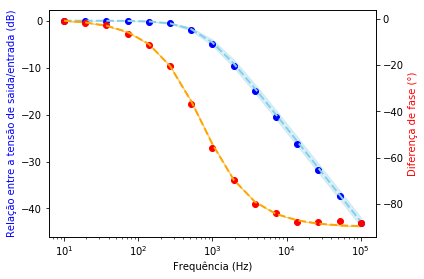

In [9]:

#plt.subplot(1,2,1)
plt.plot( passa_baixa['frequencia (Hz)'], passa_baixa['T_dB'], 'o', color='blue', markersize=6)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Relação entre a tensão de saida/entrada (dB)',color='blue')
plt.xscale('log')
plt.fill_between(freq, baixa_inf, baixa_sup, color='skyblue', alpha=0.3)
plt.plot(freq,Tdb_baixa_teo,linestyle='--',linewidth=2,color='skyblue')
plt.twinx()
#plt.subplot(1,2,2)
plt.plot( passa_baixa['frequencia (Hz)'], passa_baixa['fase (Ch2-Ch1) (graus)'], 'o', color='red', markersize=6)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Diferença de fase (°)',color='red')
plt.xscale('log')
plt.fill_between(freq, np.subtract(def_baixa_teo_valor,def_baixa_valor_incerteza), 
                 np.add(def_baixa_teo_valor,def_baixa_valor_incerteza), 
                 color='orange', alpha=0.5)
plt.plot(freq,def_baixa_teo_valor,linestyle='--',linewidth=2,color='orange')
plt.tight_layout()
plt.savefig('parte2_passa_baixa.png')


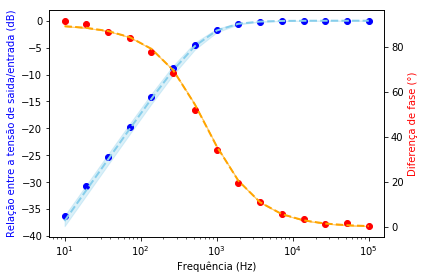

In [10]:

#plt.subplot(1,2,1)
plt.plot( passa_alta['frequencia (Hz)'], passa_alta['T_dB'], 'o', color='blue', markersize=6)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Relação entre a tensão de saida/entrada (dB)',color='blue')
plt.xscale('log')
plt.fill_between(freq, np.subtract(Tdb_alta_teo,var_alta),
                 np.add(Tdb_alta_teo,var_alta), color='skyblue', alpha=0.3)
plt.plot(freq,Tdb_alta_teo,linestyle='--',linewidth=2,color='skyblue')
plt.twinx()
#plt.subplot(1,2,2)
plt.plot( passa_alta['frequencia (Hz)'], passa_alta['fase (Ch2-Ch1) (graus)'], 'o', color='red', markersize=6)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Diferença de fase (°)',color='red')
plt.xscale('log')
plt.fill_between(freq, np.subtract(def_alta_teo_valor,def_alta_valor_incerteza), 
                 np.add(def_alta_teo_valor,def_alta_valor_incerteza), 
                 color='orange', alpha=0.5)
plt.plot(freq,def_alta_teo_valor,linestyle='--',linewidth=2,color='orange')
plt.tight_layout()
plt.savefig('parte2_passa_alta.png')

# Parte 3

In [11]:
p3bs_1 = pd.read_csv('parte3_passa baixa_13_6kHz_dados.csv')
p3bt_1 = pd.read_csv('parte3_passa baixa_13kHz_dados_triangular_dados.csv')
p3bq_1 = pd.read_csv('parte3_passa baixa_13kHz_dados_quadrada_dados.csv')
p3bsf_1 = pd.read_csv('parte3_passa baixa_10Hz_dados_dados.csv')

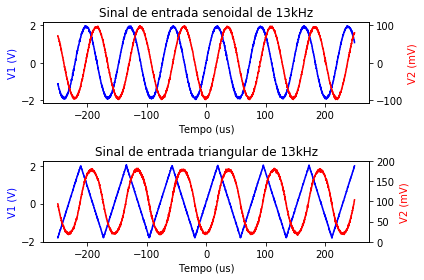

In [12]:
plt.subplot(2,1,1)
plt.plot( p3bs_1['Tempo (s)']*1000000, p3bs_1['V1 (V)'], color='blue')
plt.xlabel('Tempo (us)')
plt.ylabel('V1 (V)',color='blue')
plt.twinx()
plt.plot(p3bs_1['Tempo (s)']*1000000, p3bs_1['V2 (V)']*1000, color='red')
plt.xlabel('Tempo (us)')
plt.ylabel('V2 (mV)',color='red')
#plt.tight_layout()
plt.title('Sinal de entrada senoidal de 13kHz')

plt.subplot(2,1,2)
plt.plot( p3bt_1['Tempo (s)']*1000000, p3bt_1['V1 (V)'], color='blue')
plt.xlabel('Tempo (us)')
plt.ylabel('V1 (V)',color='blue')
plt.twinx()
plt.plot(p3bt_1['Tempo (s)']*1000000, p3bt_1['V2 (V)']*1000, color='red')
plt.xlabel('Tempo (us)')
plt.ylabel('V2 (mV)',color='red')
plt.ylim([0,200])
#plt.tight_layout()
plt.title('Sinal de entrada triangular de 13kHz')

plt.tight_layout()

plt.savefig('Parte 3 passa baixa 1.png')

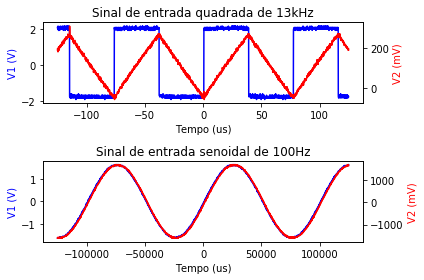

In [13]:
plt.subplot(2,1,1)
plt.plot( p3bq_1['Tempo (s)']*1000000, p3bq_1['V1 (V)'], color='blue')
plt.xlabel('Tempo (us)')
plt.ylabel('V1 (V)',color='blue')
plt.twinx()
plt.plot(p3bq_1['Tempo (s)']*1000000, p3bq_1['V2 (V)']*1000, color='red')
plt.xlabel('Tempo (us)')
plt.ylabel('V2 (mV)',color='red')
#plt.tight_layout()
plt.title('Sinal de entrada quadrada de 13kHz')

plt.subplot(2,1,2)
plt.plot( p3bsf_1['Tempo (s)']*1000000, p3bsf_1['V1 (V)'], color='blue')
plt.xlabel('Tempo (us)')
plt.ylabel('V1 (V)',color='blue')
plt.twinx()
plt.plot(p3bsf_1['Tempo (s)']*1000000, p3bsf_1['V2 (V)']*1000, color='red')
plt.xlabel('Tempo (us)')
plt.ylabel('V2 (mV)',color='red')
#plt.tight_layout()
plt.title('Sinal de entrada senoidal de 100Hz')

plt.tight_layout()

plt.savefig('Parte 3 passa baixa 2.png')

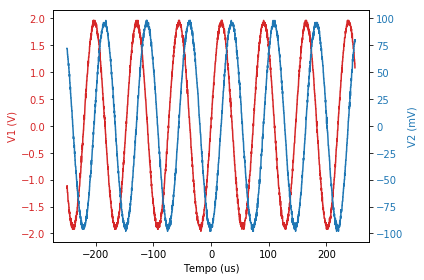

In [14]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Tempo (us)')
ax1.set_ylabel('V1 (V)', color=color)
ax1.plot(p3bs_1['Tempo (s)']*1000000, p3bs_1['V1 (V)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('V2 (mV)', color=color)  # we already handled the x-label with ax1
ax2.plot(p3bs_1['Tempo (s)']*1000000, p3bs_1['V2 (V)']*1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

In [15]:
p3b_2 = pd.read_csv('parte3_passa baixa_13kHz_dados_triangular_dados.csv')

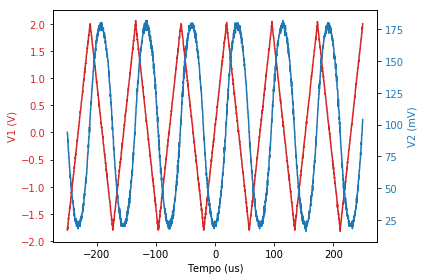

In [16]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Tempo (us)')
ax1.set_ylabel('V1 (V)', color=color)
ax1.plot(p3b_2['Tempo (s)']*1000000, p3b_2['V1 (V)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('V2 (mV)', color=color)  # we already handled the x-label with ax1
ax2.plot(p3b_2['Tempo (s)']*1000000, p3b_2['V2 (V)']*1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

In [17]:
p3as = pd.read_csv('parte3_passa alta_ 50Hz senoidal_dados.csv')
p3at = pd.read_csv('parte3_passa alta_ 50Hz triangular_dados.csv')
p3aq = pd.read_csv('parte3_passa alta_ 50Hz quadrada_dados.csv')
p3asf = pd.read_csv('parte3_passa alta_ 5kHz senoidal_dados.csv')

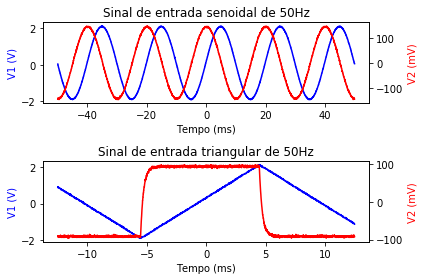

In [18]:
plt.subplot(2,1,1)
plt.plot( p3as['Tempo (s)']*1000, p3as['V1 (V)'], color='blue')
plt.xlabel('Tempo (ms)')
plt.ylabel('V1 (V)',color='blue')
plt.twinx()
plt.plot(p3as['Tempo (s)']*1000, p3as['V2 (V)']*1000, color='red')
plt.xlabel('Tempo (ms)')
plt.ylabel('V2 (mV)',color='red')
#plt.tight_layout()
plt.title('Sinal de entrada senoidal de 50Hz')

plt.subplot(2,1,2)
plt.plot( p3at['Tempo (s)']*1000, p3at['V1 (V)'], color='blue')
plt.xlabel('Tempo (ms)')
plt.ylabel('V1 (V)',color='blue')
plt.twinx()
plt.plot(p3at['Tempo (s)']*1000, p3at['V2 (V)']*1000, color='red')
plt.xlabel('Tempo (ms)')
plt.ylabel('V2 (mV)',color='red')
#plt.tight_layout()
plt.title('Sinal de entrada triangular de 50Hz')

plt.tight_layout()

plt.savefig('Parte 3 passa alta 1.png')

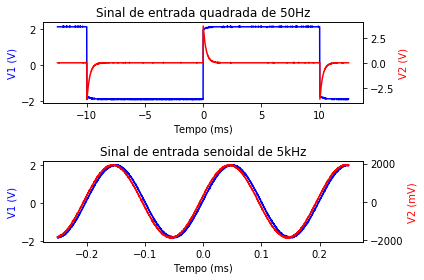

In [19]:
plt.subplot(2,1,1)
plt.plot( p3aq['Tempo (s)']*1000, p3aq['V1 (V)'], color='blue')
plt.xlabel('Tempo (ms)')
plt.ylabel('V1 (V)',color='blue')
plt.twinx()
plt.plot(p3aq['Tempo (s)']*1000, p3aq['V2 (V)'], color='red')
plt.xlabel('Tempo (ms)')
plt.ylabel('V2 (V)',color='red')
#plt.tight_layout()
plt.title('Sinal de entrada quadrada de 50Hz')

plt.subplot(2,1,2)
plt.plot( p3asf['Tempo (s)']*1000, p3asf['V1 (V)'], color='blue')
plt.xlabel('Tempo (ms)')
plt.ylabel('V1 (V)',color='blue')
plt.twinx()
plt.plot(p3asf['Tempo (s)']*1000, p3asf['V2 (V)']*1000, color='red')
plt.xlabel('Tempo (ms)')
plt.ylabel('V2 (mV)',color='red')
#plt.tight_layout()
plt.title('Sinal de entrada senoidal de 5kHz')

plt.tight_layout()

plt.savefig('Parte 3 passa alta 2.png')

In [20]:
from sympy import *

def modulo(num):
    aux = []
    for i in num:
        if i < 0:
            aux.append(-i)
        else:
            aux.append(i)
    return np.array(aux)
def calcular(data_frame,v_div,tempo_div):
    V, V_div, t, t_div = symbols('V V_div t t_div')
    u_V = 0.03*V + 0.05*V_div
    u_t = 0.0001*t + 0.004*t_div + 0.4 * 10**(-9)
    aux = u_V.subs(V_div,v_div)
    aux = lambdify(V,aux,'numpy')
    aux2 = u_t.subs(t_div,tempo_div)
    aux2 = lambdify(t,aux2,'numpy')
    data_frame['u_V'] = aux(modulo(data_frame['V2 (V)']))
    data_frame['u_t'] = aux2(modulo(data_frame['Tempo (s)']))
#V, V_div, t, t_div = symbols('V V_div t t_div')
#u_V = 0.03*V + 0.05*V_div
#u_t = 0.0001*t + 0.004*t_div + 0.4 * 10**(-9)
calcular(p3bs_1,50*0.001,50*10**(-6))
calcular(p3bt_1,200*0.001,50*10**(-6))
calcular(p3bq_1,200*0.001,25*10**(-6))
calcular(p3as,50*0.001,5*10**(-3))
calcular(p3at,50*0.001,5*10**(-3))
calcular(p3aq,1,5*10**(-3))

In [21]:
p3aq['u_V']

0       0.0512
1       0.0512
2       0.0512
3       0.0512
4       0.0512
5       0.0512
6       0.0512
7       0.0512
8       0.0512
9       0.0512
10      0.0512
11      0.0512
12      0.0512
13      0.0512
14      0.0512
15      0.0500
16      0.0512
17      0.0512
18      0.0512
19      0.0512
20      0.0512
21      0.0512
22      0.0512
23      0.0512
24      0.0512
25      0.0512
26      0.0512
27      0.0512
28      0.0512
29      0.0512
         ...  
2470    0.0512
2471    0.0512
2472    0.0512
2473    0.0512
2474    0.0512
2475    0.0512
2476    0.0512
2477    0.0512
2478    0.0512
2479    0.0512
2480    0.0512
2481    0.0512
2482    0.0512
2483    0.0512
2484    0.0512
2485    0.0512
2486    0.0512
2487    0.0512
2488    0.0512
2489    0.0512
2490    0.0512
2491    0.0512
2492    0.0512
2493    0.0512
2494    0.0512
2495    0.0512
2496    0.0512
2497    0.0512
2498    0.0512
2499    0.0512
Name: u_V, Length: 2500, dtype: float64

In [22]:
p3bs_1 = p3bs_1.loc[(p3bs_1['Tempo (s)'] > 0 ) & (p3bs_1['Tempo (s)'] < 100*10**(-6))]
p3bs_1['Tempo (s)']
p3bs_1 = p3bs_1.iloc[range(0,1749-1251,25),:]

p3bt_1 = p3bt_1.loc[(p3bt_1['Tempo (s)'] > 0 ) & (p3bt_1['Tempo (s)'] < 100*10**(-6))]
p3bt_1['Tempo (s)']
p3bt_1 = p3bt_1.iloc[range(0,len(p3bt_1['Tempo (s)']),25),:]

p3bq_1 = p3bq_1.loc[(p3bq_1['Tempo (s)'] > 0 ) & (p3bq_1['Tempo (s)'] < 100*10**(-6))]
p3bq_1['Tempo (s)']
p3bq_1 = p3bq_1.iloc[range(0,len(p3bq_1['Tempo (s)']),25),:]

p3as = p3as.loc[(p3as['Tempo (s)'] >= 0 ) & (p3as['Tempo (s)'] <= 20*10**(-3))]
p3as['Tempo (s)']
p3as = p3as.iloc[range(0,len(p3as['Tempo (s)']),25),:]

#p3at = p3at.loc[(p3at['Tempo (s)'] >= 0 ) & (p3at['Tempo (s)'] <= 20*10**(-3))]
p3at['Tempo (s)']
p3at = p3at.iloc[range(0,len(p3at['Tempo (s)']),25),:]

#p3aq = p3aq.loc[(p3aq['Tempo (s)'] >= 0 ) & (p3aq['Tempo (s)'] <= 20*10**(-3))]
p3aq['Tempo (s)']
p3aq= p3aq.iloc[range(0,len(p3aq['Tempo (s)']),25),:]


<ErrorbarContainer object of 3 artists>

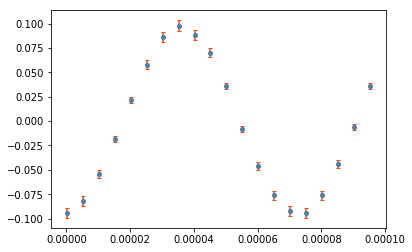

In [23]:
plt.errorbar(x=p3bs_1['Tempo (s)'],y=p3bs_1['V2 (V)'],xerr=p3bs_1['u_t'],yerr=p3bs_1['u_V'],fmt='o', ecolor='orangered',
            color='steelblue', capsize=2,markersize=4)

Text(0, 0.5, 'Tensão V2 (uV)')

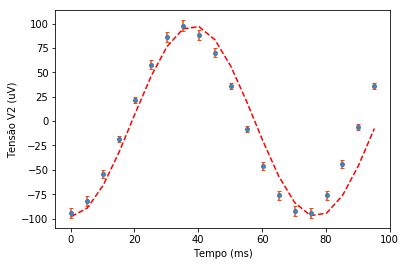

In [24]:
from sympy import *
A, u_A, f, u_f, t = symbols('a u_A f u_f t') #u_a = 0,1V
int_s = -cos(2*pi*f*t)/(2*pi*f)
int_s = int_s.subs([(f,13000)])
int_s = lambdify(t,int_s,'numpy')
#u_int_s = lambdify(t,sqrt(diff(int_s,A)**2*u_A**2).subs([(A,2),(u_A,0.1),(f,13000)]),'numpy')
#u_int_s = u_int_s(p3bs_1['Tempo (s)'])
plt.errorbar(x=p3bs_1['Tempo (s)']*1000000,y=p3bs_1['V2 (V)']*1000,xerr=p3bs_1['u_t']*1000000,yerr=p3bs_1['u_V']*1000,fmt='o', ecolor='orangered',
            color='steelblue', capsize=2,markersize=4)
plt.plot(p3bs_1['Tempo (s)']*1000000, int_s(p3bs_1['Tempo (s)'])*8000000,color='red',linestyle='--')
plt.xlabel('Tempo (ms)')
plt.ylabel('Tensão V2 (uV)')

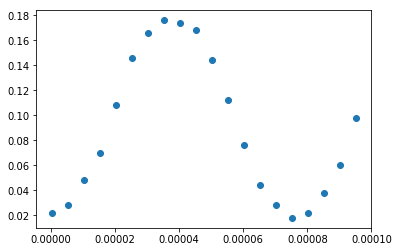

In [25]:
plt.plot(p3bt_1['Tempo (s)'],p3bt_1['V2 (V)'],'o')

In [26]:
A, u_A, t = symbols('a u_A t')

def funcao(tempo):
    aux = np.zeros(len(tempo))
    for i in range(10000):
        aux += 16/(np.pi**2 * (2*i+1)**2) * np.sin((2*i+1)*2*np.pi*13000*tempo - np.pi/2)/((2*i+1)*2*np.pi*13000)
    return aux

p3bt_2 = funcao(p3bt_1['Tempo (s)'])
p3bt_2

1251   -0.000021
1276   -0.000018
1301   -0.000013
1326   -0.000006
1351    0.000001
1376    0.000009
1401    0.000015
1426    0.000020
1451    0.000020
1476    0.000017
1501    0.000011
1526    0.000004
1551   -0.000004
1576   -0.000011
1601   -0.000017
1626   -0.000020
1651   -0.000020
1676   -0.000015
1701   -0.000009
1726   -0.000001
Name: Tempo (s), dtype: float64

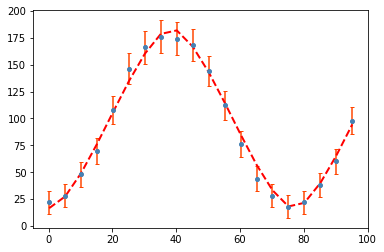

In [27]:
plt.errorbar(x=p3bt_1['Tempo (s)']*1000000,y=p3bt_1['V2 (V)']*1000,xerr=p3bt_1['u_t']*1000000,yerr=p3bt_1['u_V']*1000,fmt='o', ecolor='orangered',
            color='steelblue', capsize=2,markersize=4)
plt.plot(p3bt_1['Tempo (s)']*1000000,(p3bt_2*4000050)+100,linestyle='--',linewidth=2,color='red')

In [28]:
def funcao2(tempo):
    aux = np.zeros(len(tempo))
    for i in range(1000):
        n = 2*i + 1
        aux += 2/(n**2*np.pi*2*np.pi*13000)*np.sin(n*2*np.pi*13000*tempo - np.pi/2)
    return aux
p3bq_2 = funcao2(p3bq_1['Tempo (s)'])

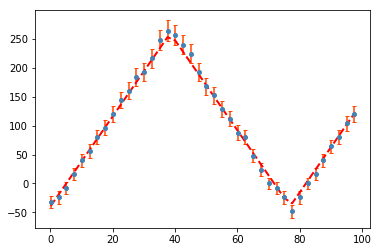

In [29]:
plt.errorbar(x=p3bq_1['Tempo (s)']*1000000,y=p3bq_1['V2 (V)']*1000,xerr=p3bq_1['u_t']*1000000,yerr=p3bq_1['u_V']*1000,fmt='o', ecolor='orangered',
            color='steelblue', capsize=2,markersize=4)
plt.plot(p3bq_1['Tempo (s)']*1000000,(p3bq_2*15550000)+110,linestyle='--',linewidth=2,color='red')

In [30]:
p3as_2 = np.cos(2*np.pi*50*p3as['Tempo (s)'])

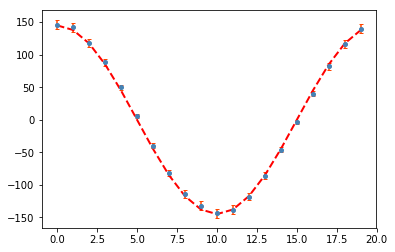

In [31]:
plt.errorbar(x=p3as['Tempo (s)']*1000,y=p3as['V2 (V)']*1000,xerr=p3as['u_t']*1000,yerr=p3as['u_V']*1000,fmt='o', ecolor='orangered',
            color='steelblue', capsize=2,markersize=4)
plt.plot(p3as['Tempo (s)']*1000,(p3as_2)*145,linestyle='--',linewidth=2,color='red')

In [32]:
def funcao3(tempo):
    aux = np.zeros(len(tempo))
    for i in range(1000):
        n = 2*i+1
        aux -= 8*2*np.sin(2*np.pi*50*n*tempo- np.pi) / (np.pi*n)
    return aux
p3at_2 = funcao3(p3at['Tempo (s)'])

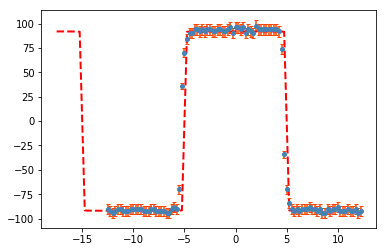

In [33]:
plt.errorbar(x=p3at['Tempo (s)']*1000,y=p3at['V2 (V)']*1000,xerr=p3at['u_t']*1000,yerr=p3at['u_V']*1000,fmt='o', ecolor='orangered',
            color='steelblue', capsize=2,markersize=4)
plt.plot(p3at['Tempo (s)']*1000-5,(p3at_2)*23,linestyle='--',linewidth=2,color='red')

In [34]:
def funcao4(tempo):
    aux = np.zeros(len(tempo))
    for i in range(1000):
        n = 2*i+1
        aux -= 2/(n*np.pi) * n*2*np.pi*50*np.sin(n*2*np.pi*50*tempo - np.pi/2)
    return np.array(aux)

p3aq_2 = funcao4(p3at['Tempo (s)']) 
p3aq_2
np.shape(p3aq['Tempo (s)'])

(100,)

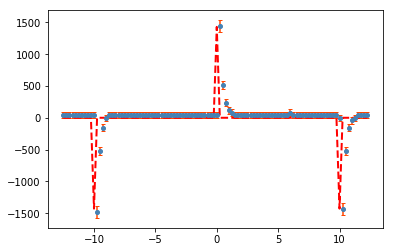

In [35]:
plt.errorbar(x=p3aq['Tempo (s)']*1000,y=p3aq['V2 (V)']*1000,xerr=p3aq['u_t']*1000,yerr=p3aq['u_V']*1000,fmt='o', ecolor='orangered',
            color='steelblue', capsize=2,markersize=4)
plt.plot(p3aq['Tempo (s)']*1000,(p3aq_2)/140,linestyle='--',linewidth=2,color='red')

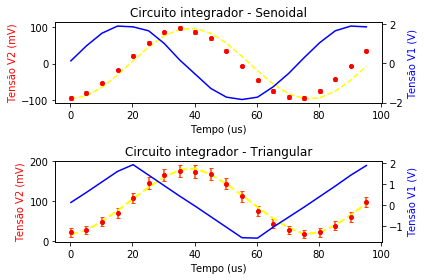

In [36]:
plt.subplot(2,1,1)
plt.errorbar(x=p3bs_1['Tempo (s)']*1000000,y=p3bs_1['V2 (V)']*1000,xerr=p3bs_1['u_t']*1000000,yerr=p3bs_1['u_V']*1000,fmt='o', ecolor='orangered',
            color='red', capsize=2,markersize=4)
plt.plot(p3bs_1['Tempo (s)']*1000000, int_s(p3bs_1['Tempo (s)'])*8000000,color='yellow',linestyle='--')
plt.xlabel('Tempo (us)')
plt.ylabel('Tensão V2 (mV)',color='red')
plt.title('Circuito integrador - Senoidal')
plt.twinx()
plt.plot( p3bs_1['Tempo (s)']*1000000, p3bs_1['V1 (V)'], color='blue')
plt.ylabel('Tensão V1 (V)',color='blue')

plt.subplot(2,1,2)
plt.errorbar(x=p3bt_1['Tempo (s)']*1000000,y=p3bt_1['V2 (V)']*1000,xerr=p3bt_1['u_t']*1000000,yerr=p3bt_1['u_V']*1000,fmt='o', ecolor='orangered',
            color='red', capsize=2,markersize=4)
plt.plot(p3bt_1['Tempo (s)']*1000000,(p3bt_2*4000050)+100,linestyle='--',linewidth=2,color='yellow')
plt.ylabel('Tensão V2 (mV)',color='red')
plt.xlabel('Tempo (us)')
plt.twinx()
plt.plot( p3bt_1['Tempo (s)']*1000000, p3bt_1['V1 (V)'], color='blue')
plt.ylabel('Tensão V1 (V)',color='blue')
plt.title('Circuito integrador - Triangular')
plt.tight_layout()
plt.savefig('grafico 3_1.png')

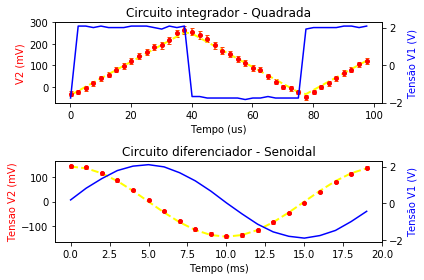

In [37]:
plt.subplot(2,1,1)
plt.errorbar(x=p3bq_1['Tempo (s)']*1000000,y=p3bq_1['V2 (V)']*1000,xerr=p3bq_1['u_t']*1000000,yerr=p3bq_1['u_V']*1000,fmt='o', ecolor='orangered',
            color='red', capsize=2,markersize=4)
plt.plot(p3bq_1['Tempo (s)']*1000000,(p3bq_2*15550000)+110,linestyle='--',linewidth=2,color='yellow')
plt.ylabel('V2 (mV)',color='red')
plt.xlabel('Tempo (us)')
plt.twinx()
plt.plot( p3bq_1['Tempo (s)']*1000000, p3bq_1['V1 (V)'], color='blue')
plt.ylabel('Tensão V1 (V)',color='blue')
plt.title('Circuito integrador - Quadrada')
plt.subplot(2,1,2)
plt.errorbar(x=p3as['Tempo (s)']*1000,y=p3as['V2 (V)']*1000,xerr=p3as['u_t']*1000,yerr=p3as['u_V']*1000,fmt='o', ecolor='orangered',
            color='red', capsize=2,markersize=4)
plt.plot(p3as['Tempo (s)']*1000,(p3as_2)*145,linestyle='--',linewidth=2,color='yellow')
plt.ylabel('Tensao V2 (mV)',color='red')
plt.xlabel('Tempo (ms)')
plt.twinx()
plt.plot( p3as['Tempo (s)']*1000, p3as['V1 (V)'], color='blue')
plt.ylabel('Tensão V1 (V)',color='blue')
plt.title('Circuito diferenciador - Senoidal')
plt.tight_layout()
plt.savefig('grafico 3_2.png')

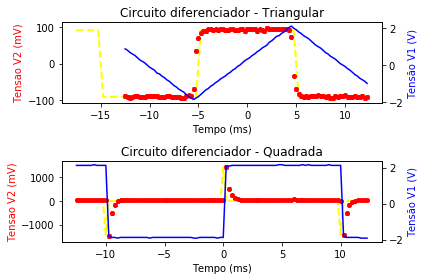

In [38]:
plt.subplot(2,1,1)
plt.errorbar(x=p3at['Tempo (s)']*1000,y=p3at['V2 (V)']*1000,xerr=p3at['u_t']*1000,yerr=p3at['u_V']*1000,fmt='o', ecolor='orangered',
            color='red', capsize=2,markersize=4)
plt.plot(p3at['Tempo (s)']*1000-5,(p3at_2)*23,linestyle='--',linewidth=2,color='yellow')
plt.xlabel('Tempo (ms)')
plt.ylabel('Tensao V2 (mV)',color='red')
plt.twinx()
plt.plot( p3at['Tempo (s)']*1000, p3at['V1 (V)'], color='blue')
plt.ylabel('Tensão V1 (V)',color='blue')
plt.title('Circuito diferenciador - Triangular')
plt.subplot(2,1,2)
plt.errorbar(x=p3aq['Tempo (s)']*1000,y=p3aq['V2 (V)']*1000,xerr=p3aq['u_t']*1000,yerr=p3aq['u_V']*1000,fmt='o', ecolor='orangered',
            color='red', capsize=2,markersize=4)
plt.plot(p3aq['Tempo (s)']*1000,(p3aq_2)/140,linestyle='--',linewidth=2,color='yellow')
plt.xlabel('Tempo (ms)')
plt.ylabel('Tensao V2 (mV)',color='red')
plt.twinx()
plt.plot( p3aq['Tempo (s)']*1000, p3aq['V1 (V)'], color='blue')
plt.ylabel('Tensão V1 (V)',color='blue')
plt.title('Circuito diferenciador - Quadrada')
plt.tight_layout()
plt.savefig('grafico 3_3.png')

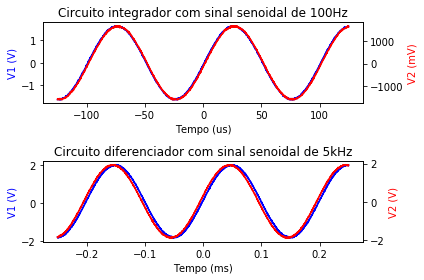

In [39]:
plt.subplot(2,1,1)
plt.plot( p3bsf_1['Tempo (s)']*1000, p3bsf_1['V1 (V)'], color='blue')
plt.xlabel('Tempo (us)')
plt.ylabel('V1 (V)',color='blue')
plt.twinx()
plt.plot(p3bsf_1['Tempo (s)']*1000, p3bsf_1['V2 (V)']*1000, color='red')
plt.xlabel('Tempo (ms)')
plt.ylabel('V2 (mV)',color='red')
#plt.tight_layout()
plt.title('Circuito integrador com sinal senoidal de 100Hz')


plt.subplot(2,1,2)
plt.plot( p3asf['Tempo (s)']*1000, p3asf['V1 (V)'], color='blue')
plt.xlabel('Tempo (ms)')
plt.ylabel('V1 (V)',color='blue')
plt.twinx()
plt.plot(p3asf['Tempo (s)']*1000, p3asf['V2 (V)'], color='red')
plt.xlabel('Tempo (ms)')
plt.ylabel('V2 (V)',color='red')
#plt.tight_layout()
plt.title('Circuito diferenciador com sinal senoidal de 5kHz')
plt.tight_layout()
plt.savefig('grafico 3_erros.png')